# 1. Introduction


# _PRN: 21070126039_ &emsp;_Name: Jainil Patel_&emsp; _Batch: AI/ML A2_******
## Git Repository : [GitRepo](https://github.com/astro215/NLP) <br>

# 1.2. Importing the libraries

In [35]:
# Importing the libraries
# Preprocessing the data using NLTK

# Importing the libraries/////
import nltk
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import pandas as pd
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /usr/share/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /usr/share/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /usr/share/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /usr/share/nltk_data...
[nltk_data]    |   Pack

True

# 1.3. Importing the dataset

In [37]:
import re
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from sklearn.metrics import classification_report


In [50]:
df = pd.read_csv(r"/kaggle/input/multilingual-lyrics-for-genre-classification/train.csv")
df.head()# reading and showing dataset


,Artist,Song,Genre,Language,Lyrics
0,12 stones,world so cold,Rock,en,"It starts with pain, followed by hate\nFueled ..."
1,12 stones,broken,Rock,en,Freedom!\nAlone again again alone\nPatiently w...
2,12 stones,3 leaf loser,Rock,en,"Biting the hand that feeds you, lying to the v..."
3,12 stones,anthem for the underdog,Rock,en,You say you know just who I am\nBut you can't ...
4,12 stones,adrenaline,Rock,en,My heart is beating faster can't control these...


# 2. Data Preprocessing

In [51]:
df.dropna(inplace=True) # preprocessing 

In [52]:
df['Genre'].value_counts()

Genre
Rock          121390
Pop           108693
Metal          20286
Jazz           13545
Folk            8644
Indie           8449
R&B             2793
Hip-Hop         2240
Electronic      2213
Country         1890
Name: count, dtype: int64

In [53]:
df = df[df['Genre'].isin(['Rock', 'Jazz', 'Hip-Hop', 'Metal', 'Country'])]
df = df.dropna()  # Remove empty rows
df = df.drop_duplicates()  # Remove duplicates

In [54]:
df.shape

(147771, 5)

# 2.1. Lemmatization and Tokenization

In [42]:
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
!unzip /usr/share/nltk_data/corpora/wordnet.zip -d /usr/share/nltk_data/corpora/

[nltk_data] Downloading package stopwords to /usr/share/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Archive:  /usr/share/nltk_data/corpora/wordnet.zip
replace /usr/share/nltk_data/corpora/wordnet/lexnames? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [55]:
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    # Tokenization and Lemmatization
    tokens = word_tokenize(text)
    tokens = [lemmatizer.lemmatize(token) for token in tokens]

    # Data Cleansing
    text = ' '.join(tokens)
    text = re.sub(r'http\S+', '', text)  # Remove URLs
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # Remove symbols
    text = re.sub(r' +', ' ', text)  # Remove excess whitespaces
    text = text.lower()  # Lowercase text

    return text

df['Lyrics'] = df['Lyrics'].apply(preprocess_text)

In [56]:
df["Lyrics"].head()

0    it start with pain followed by hate fueled by ...
1    freedom alone again again alone patiently wait...
2    biting the hand that feed you lying to the voi...
3    you say you know just who i am but you ca nt i...
4    my heart is beating faster ca nt control these...
Name: Lyrics, dtype: object

# 3. Data Cleaning

## 3.1 Remove stopwords, Remove symbols, Remove URLs

In [57]:
# Data Cleansing: Remove stopwords, remove symbols, remove URLs
# Importing the libraries
import re
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))

In [58]:
# Defining a function to clean the text
def clean_Text(text):
    # Remove URLs
    text = re.sub(r'http\S+', '', text)
    # Remove symbols and numbers
    text = re.sub(r'[^\w\s]', '', text)
    # Remove stopwords
    text = " ".join([word for word in text.split() if word.lower() not in stop_words])
     
    # Remove excess whitespaces
    text = ' '.join(text.split())
    
    # Replace abbreviations (you can add more if needed)
    text = re.sub(r"won't", "will not", text)
    text = re.sub(r"can't", "cannot", text)
    
    # Fix contractions
    text = re.sub(r"n't", " not", text)
    text = re.sub(r"'re", " are", text)
    text = re.sub(r"'s", " is", text)
    text = re.sub(r"'d", " would", text)
    text = re.sub(r"'ll", " will", text)
    text = re.sub(r"'t", " not", text)
    text = re.sub(r"'ve", " have", text)
    return text

In [59]:
df.rename(columns={'Lyrics': 'lyrics'}, inplace=True)
df.rename(columns={'Genre': 'genre'}, inplace=True)


In [60]:
# Applying the clean Text function to the Text column
df['lyrics'] = df['lyrics'].apply(clean_Text)

# Displaying the first 5 rows of the dataset
df.head()

,Artist,Song,genre,Language,lyrics
0,12 stones,world so cold,Rock,en,start pain followed hate fueled endless questi...
1,12 stones,broken,Rock,en,freedom alone alone patiently waiting phone ho...
2,12 stones,3 leaf loser,Rock,en,biting hand feed lying voice inside reach beg ...
3,12 stones,anthem for the underdog,Rock,en,say know ca nt imagine wait across line though...
4,12 stones,adrenaline,Rock,en,heart beating faster ca nt control feeling any...


# 4. Split the dataset into train and test sets

In [63]:
X_train, X_test, y_train, y_test = train_test_split(df['lyrics'], df['genre'], test_size=0.2, random_state=42)


# 5. Model training

In [64]:
# Set 1 Parameters
batch_size_1 = 4
max_sequence_length_1 = 50
embedding_dim_1 = 50
max_words_1 = 10000
lstm_units_1 = 32

tokenizer = Tokenizer(num_words=max_words_1)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_length_1)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_sequence_length_1)

# Encode genre labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [65]:
# Build and train the LSTM model for Set 1
model_1 = Sequential()
model_1.add(Embedding(input_dim=max_words_1, output_dim=embedding_dim_1, input_length=max_sequence_length_1))
model_1.add(LSTM(lstm_units_1))
model_1.add(Dense(5, activation='softmax'))  # 5 genres

model_1.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_1.fit(X_train_pad, y_train_encoded, epochs=30, batch_size=batch_size_1, validation_split=0.2)

# Evaluate the model for Set 1
y_pred_1 = model_1.predict(X_test_pad)
y_pred_classes_1 = [label_encoder.classes_[i] for i in y_pred_1.argmax(axis=-1)]


Epoch 1/30
23643/23643 [==============================] - 165s 7ms/step - loss: 0.6223 - accuracy: 0.7924 - val_loss: 0.5554 - val_accuracy: 0.8140
Epoch 2/30
23643/23643 [==============================] - 141s 6ms/step - loss: 0.5164 - accuracy: 0.8277 - val_loss: 0.5468 - val_accuracy: 0.8182
Epoch 3/30
23643/23643 [==============================] - 146s 6ms/step - loss: 0.4650 - accuracy: 0.8463 - val_loss: 0.5541 - val_accuracy: 0.8181
Epoch 4/30
23643/23643 [==============================] - 140s 6ms/step - loss: 0.4185 - accuracy: 0.8611 - val_loss: 0.5876 - val_accuracy: 0.8175
Epoch 5/30
23643/23643 [==============================] - 140s 6ms/step - loss: 0.3747 - accuracy: 0.8758 - val_loss: 0.5985 - val_accuracy: 0.8147
Epoch 6/30
23643/23643 [==============================] - 147s 6ms/step - loss: 0.3340 - accuracy: 0.8898 - val_loss: 0.6279 - val_accuracy: 0.8105
Epoch 7/30
23643/23643 [==============================] - 140s 6ms/step - loss: 0.2952 - accuracy: 0.9034 - val_

## Classification Result

In [66]:
print("Results for Set 1:")
print(classification_report(y_test, y_pred_classes_1))

Results for Set 1:
              precision    recall  f1-score   support

     Country       0.04      0.03      0.03       375
     Hip-Hop       0.40      0.37      0.38       434
        Jazz       0.66      0.61      0.63      2718
       Metal       0.53      0.51      0.52      3838
        Rock       0.85      0.87      0.86     22190

    accuracy                           0.78     29555
   macro avg       0.50      0.48      0.49     29555
weighted avg       0.78      0.78      0.78     29555



In [67]:
# Set 2 Parameters
batch_size_2 = 8
max_sequence_length_2 = 30
embedding_dim_2 = 30
max_words_2 = 25000
lstm_units_2 = 32

tokenizer = Tokenizer(num_words=max_words_2)
tokenizer.fit_on_texts(X_train)
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

X_train_pad = pad_sequences(X_train_seq, maxlen=max_sequence_length_2)
X_test_pad = pad_sequences(X_test_seq, maxlen=max_sequence_length_2)

# Encode genre labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [68]:
# Build and train the LSTM model for Set 2
model_2 = Sequential()
model_2.add(Embedding(input_dim=max_words_2, output_dim=embedding_dim_2, input_length=max_sequence_length_2))
model_2.add(LSTM(lstm_units_2, return_sequences=True))  # Two layers of LSTM
model_2.add(LSTM(lstm_units_2))
model_2.add(Dense(5, activation='softmax'))  # 5 genres

model_2.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_2.fit(X_train_pad, y_train_encoded, epochs=25, batch_size=batch_size_2, validation_split=0.2)

# Evaluate the model for Set 2
y_pred_2 = model_2.predict(X_test_pad)
y_pred_classes_2 = [label_encoder.classes_[i] for i in y_pred_2.argmax(axis=-1)]



Epoch 1/25
11822/11822 [==============================] - 121s 10ms/step - loss: 0.6605 - accuracy: 0.7817 - val_loss: 0.5933 - val_accuracy: 0.8030
Epoch 2/25
11822/11822 [==============================] - 97s 8ms/step - loss: 0.5480 - accuracy: 0.8194 - val_loss: 0.5728 - val_accuracy: 0.8101
Epoch 3/25
11822/11822 [==============================] - 97s 8ms/step - loss: 0.4909 - accuracy: 0.8394 - val_loss: 0.5807 - val_accuracy: 0.8142
Epoch 4/25
11822/11822 [==============================] - 96s 8ms/step - loss: 0.4448 - accuracy: 0.8554 - val_loss: 0.5929 - val_accuracy: 0.8115
Epoch 5/25
11822/11822 [==============================] - 98s 8ms/step - loss: 0.4010 - accuracy: 0.8702 - val_loss: 0.6360 - val_accuracy: 0.8048
Epoch 6/25
11822/11822 [==============================] - 97s 8ms/step - loss: 0.3590 - accuracy: 0.8840 - val_loss: 0.6555 - val_accuracy: 0.8072
Epoch 7/25
11822/11822 [==============================] - 97s 8ms/step - loss: 0.3212 - accuracy: 0.8966 - val_loss:

## Classification Result

In [69]:
print("\nResults for Set 2:")
print(classification_report(y_test, y_pred_classes_2))



Results for Set 2:
              precision    recall  f1-score   support

     Country       0.04      0.05      0.05       375
     Hip-Hop       0.35      0.27      0.31       434
        Jazz       0.56      0.62      0.59      2718
       Metal       0.49      0.47      0.48      3838
        Rock       0.85      0.84      0.85     22190

    accuracy                           0.76     29555
   macro avg       0.46      0.45      0.45     29555
weighted avg       0.76      0.76      0.76     29555



In [70]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import numpy as np

# Function to plot the multiclass confusion matrix
def plot_multiclass_confusion_matrix(y_true, y_pred, classes, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    plt.xlabel('Predicted label')
    plt.ylabel('True label')

    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, format(cm[i, j], 'd'), horizontalalignment="center", 
                     color="white" if cm[i, j] > cm.max() / 2 else "black")

    plt.show()


## Confusion Matrix

924/924 [==============================] - 3s 2ms/step


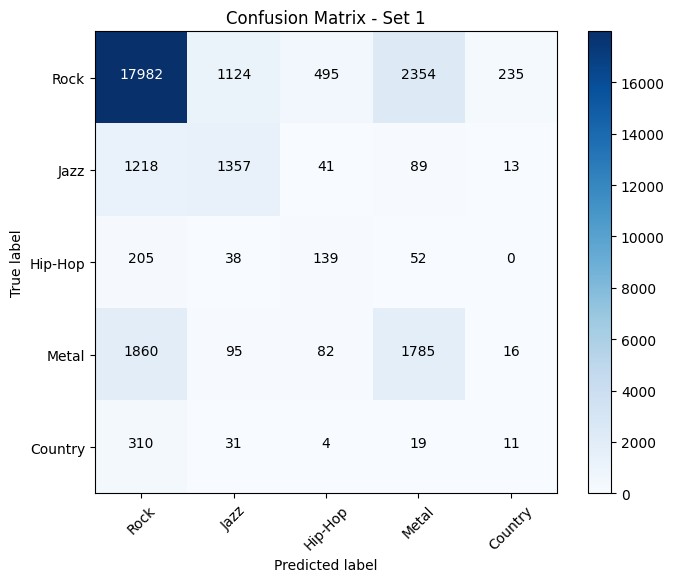

In [71]:
# Define genre classes
genre_classes = ['Rock', 'Jazz', 'Hip-Hop', 'Metal', 'Country']

# Evaluate the model for Set 1
y_pred_1 = model_1.predict(X_test_pad)
y_pred_classes_1 = [np.argmax(pred) for pred in y_pred_1]

# Map the encoded genre labels back to genre names
y_true_genre = [genre_classes[label] for label in y_test_encoded]
y_pred_genre = [genre_classes[label] for label in y_pred_classes_1]

# Plot the multiclass confusion matrix for Set 1
plot_multiclass_confusion_matrix(y_true_genre, y_pred_genre, genre_classes, "Confusion Matrix - Set 1")


924/924 [==============================] - 3s 3ms/step


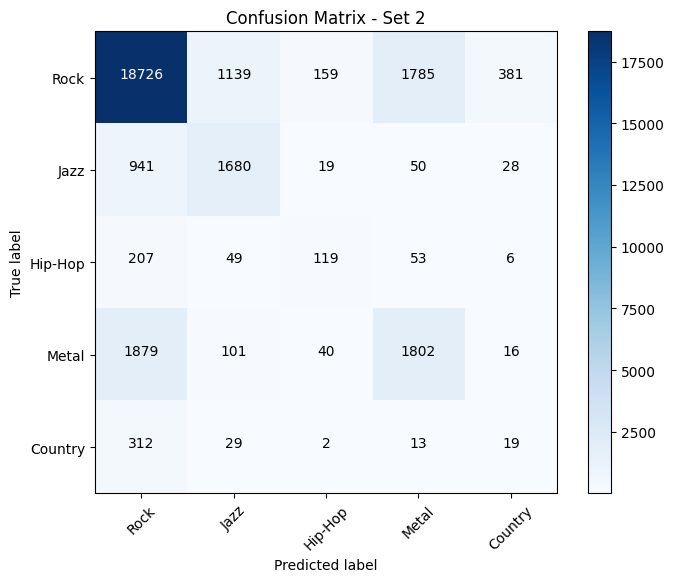

In [74]:
# Define genre classes
genre_classes = ['Rock', 'Jazz', 'Hip-Hop', 'Metal', 'Country']

# Evaluate the model for Set 1
y_pred_2 = model_2.predict(X_test_pad)
y_pred_classes_2 = [np.argmax(pred) for pred in y_pred_2]

# Map the encoded genre labels back to genre names
y_true_genre = [genre_classes[label] for label in y_test_encoded]
y_pred_genre = [genre_classes[label] for label in y_pred_classes_2]

# Plot the multiclass confusion matrix for Set 1
plot_multiclass_confusion_matrix(y_true_genre, y_pred_genre, genre_classes, "Confusion Matrix - Set 2")


## Comparison

- Accuracy: Set 1 has a slightly higher accuracy (0.78) compared to Set 2 (0.76).
- Precision: Set 1 generally has higher precision values for most classes compared to Set 2.
- Recall: Set 1 also has higher recall values for most classes.
- F1-Score: Set 1 achieves higher F1-scores for most classes, indicating a better balance between precision and recall.

Based on the provided classification reports, Set 1 with a single layer LSTM and specific parameter settings appears to perform better than Set 2 with two layers of LSTM. However, it's important to note that other factors, such as hyperparameter tuning and dataset size, can also influence model performance. Further optimization may be needed to achieve the best results.